In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('StudentsPerformance.csv')

In [24]:
print(df.shape)

(1000, 8)


In [25]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [27]:
print(df.nunique())

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64


In [28]:
print(df.isnull())

     gender  race/ethnicity  parental level of education  lunch  \
0     False           False                        False  False   
1     False           False                        False  False   
2     False           False                        False  False   
3     False           False                        False  False   
4     False           False                        False  False   
..      ...             ...                          ...    ...   
995   False           False                        False  False   
996   False           False                        False  False   
997   False           False                        False  False   
998   False           False                        False  False   
999   False           False                        False  False   

     test preparation course  math score  reading score  writing score  
0                      False       False          False          False  
1                      False       False         

In [29]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [30]:
print(df.isnull().sum()/(len(df)))

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


In [32]:
print(df[['gender', 'race/ethnicity', 'math score']])

     gender race/ethnicity  math score
0    female        group B          72
1    female        group C          69
2    female        group B          90
3      male        group A          47
4      male        group C          76
..      ...            ...         ...
995  female        group E          88
996    male        group C          62
997  female        group C          59
998  female        group D          68
999  female        group D          77

[1000 rows x 3 columns]


In [33]:
print(df.lunch.unique())

['standard' 'free/reduced']


In [34]:
print(df.lunch.nunique())

2


In [36]:
df['lunch'].replace({'standard':'Standard', 'free/reduced': 'Free/Reduced'})

0          Standard
1          Standard
2          Standard
3      Free/Reduced
4          Standard
           ...     
995        Standard
996    Free/Reduced
997    Free/Reduced
998        Standard
999    Free/Reduced
Name: lunch, Length: 1000, dtype: object

In [37]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [39]:
new_cols = df.select_dtypes(include=np.number).columns.tolist()
print(new_cols)

['math score', 'reading score', 'writing score']


math score
-0.27893514909431694
Skew : -0.28


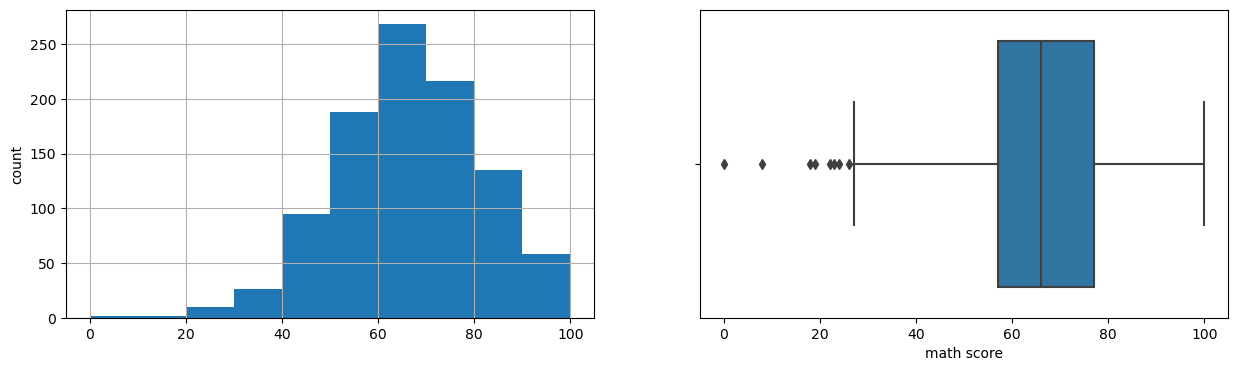

reading score
-0.25910451810923063
Skew : -0.26


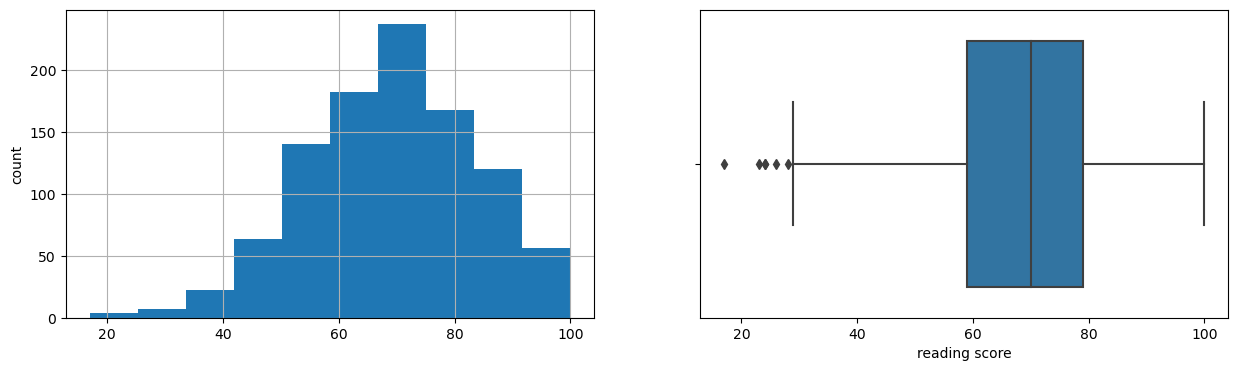

writing score
-0.28944397150761897
Skew : -0.29


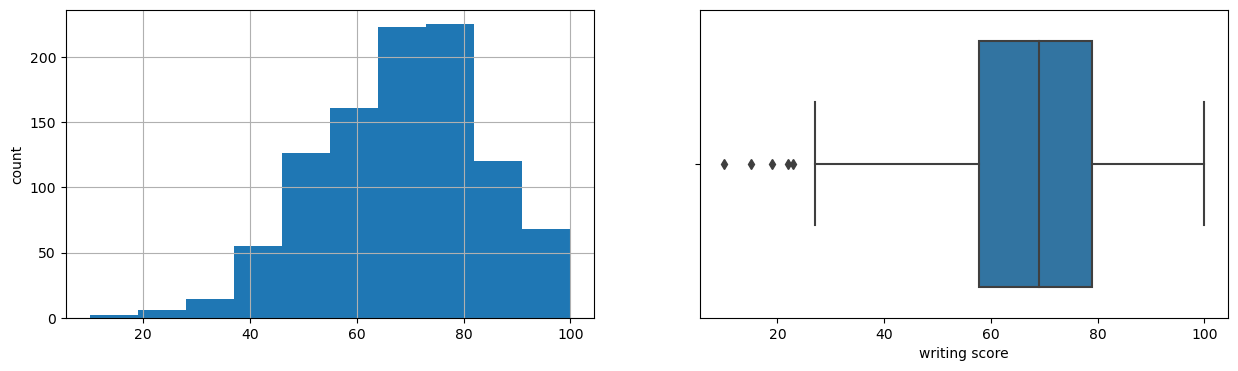

In [45]:
for col in new_cols:
    print(col)
    print(df[col].skew())
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

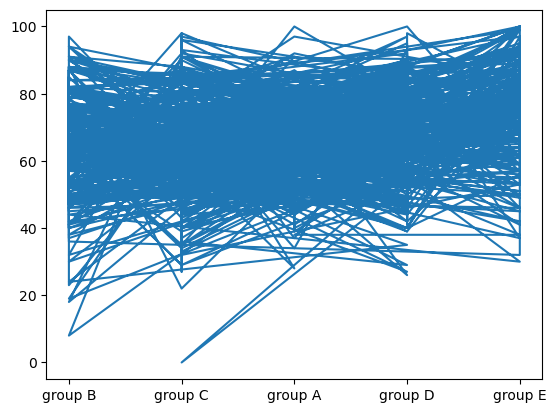

In [52]:
x = np.array(df['race/ethnicity'])
y = np.array(df['math score'])
# plt.subplot(1,1,1)
fig, ax = plt.subplots()

ax.plot(x,y)
plt.show()

<Axes: xlabel='lunch', ylabel='count'>

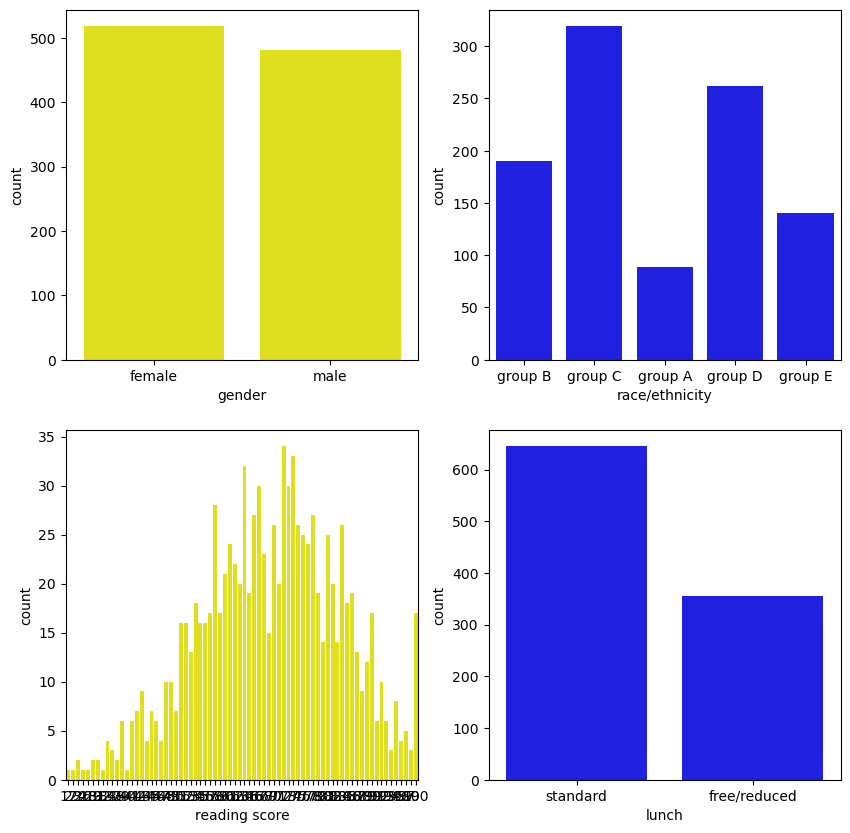

In [61]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.countplot(ax = ax[0,0], x = 'gender', data = df, color = 'yellow')
sns.countplot(ax = ax[0,1], x = 'race/ethnicity', data = df, color = 'blue')
sns.countplot(ax = ax[1,0], x = 'reading score', data = df, color = 'yellow')
sns.countplot(ax = ax[1,1], x = 'lunch', data = df, color = 'blue')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   reading score_log            1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


/var/folders/hn/lk6jpwx12ks8j5rs53v__39r0000gp/T/ipykernel_1241/104823905.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["reading score_log"], axlabel="reading score_log");


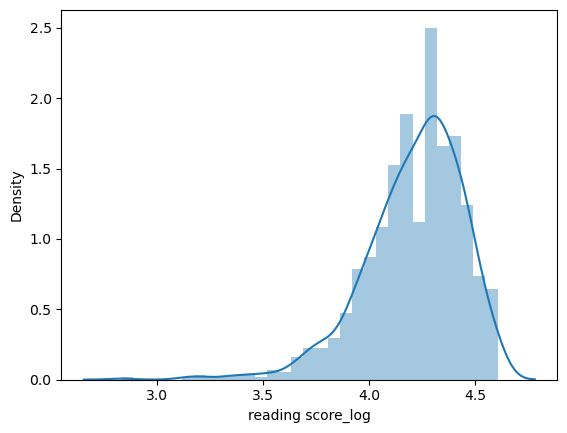

In [65]:
def log_transform(data,col):
    for colname in col:
        if (df[colname] == 1.0).all():
            df[colname + '_log'] = np.log(df[colname]+1)
        else:
            df[colname + '_log'] = np.log(df[colname])
    df.info()
log_transform(df,['reading score'])
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(df["reading score_log"], axlabel="reading score_log");

In [67]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['gender', 'race/ethnicity', 'lunch', 'parental level of education'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

ValueError: could not convert string to float: 'none'

<Figure size 1200x700 with 0 Axes>